<h2>FPMI contrast ratio</h2>

In [1]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy.signal                
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

                                              ..-
    PyKat 1.2.81          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
a= np.zeros(200)
c=0
for R in numpy.arange(24,36,0.1):  #change RoC from 24-36m
c=c+1

code="""

    ############################################################
    ## Fringe Contrast Ratio modified version of 
    ## Technical Note LIGO-T1000543-v2 by Koji Arai
    ## Sep 4, 2021 by Parivesh C.
    ############################################################


    maxtem 6
    trace 6
   
    const fmod 7M                    # modulation frequency
    const l 9.1
        
    l L1 1.000 0 nL                  # Input Laser P=1
    tem L1 0 0 1 0
    mod EOM1 $fmod 0.01 1 pm nL n1   # EOM
    s s1 0 n1 nPRC6



    ###############
    # Michelson section
    ###############
    # Main BS
    # bs name T loss phi alpha node1 node2 node3 node4
    bs1 BS 0.5 0 0 45 nPRC6 nMIY nMIX nSRC6

    # X Arm
    s sMIX 1 nMIX nPOX
    # name T loss phi node
    m ITMX 0.990 0.001 90 nPOX nARMX1
    s sARMX $l nARMX1 nARMX2
    m ETMX 0.998 0.001 90 nARMX2 nTRX
    attr ETMX Rc 31

    # define working modes
    cav cavX ITMX nARMX1 ETMX nARMX2

    # Y Arm
    s sMIY 1 nMIY nPOY
    m ITMY 0.990 0.001 0 nPOY nARMY1
    s sARMY $l nARMY1 nARMY2
    m ETMY 0.998 0.001 0 nARMY2 nTRY
    attr ETMY Rc 31
    ########### ^^ change this number for the test ###########

    ## name f node
    xaxis BS phi lin -63.6396 63.6396 2
    # This yields the scan of the BS phase
    # from Bright through Dark and then to the bright again.
    
    pd pddark nSRC6
    # for servo locking
    pd1 pd1dark $fmod 0 nPOY

    # servo to lock the secondary arm
    set err pd1dark re
    lock z $err 10 1n
    put* ETMY phi $z
    yaxis lin abs



    """.format(Radius=R)            #not necessary can be removed
    bas1 = finesse.kat() 
    bas1.verbose = 0
    bas1.parse(code)
    
    #change RoC of mirrors
    bas1.ETMY.Rcx = R
    bas1.ETMY.Rcy = R
    
    out1 = bas1.run()

    # fringe contrast ratio

    a[c]=1-(np.max(out1['pddark'])-np.min(out1['pddark']))/(np.max(out1['pddark'])+np.min(out1['pddark']))
    print(a[c])
    
    

0.00018623067809420135
0.00017984651654878725
0.00017362420874977857
0.00016755372703858296
0.00016162985845347144
0.00015584905421561768
0.00015020842495294673
0.0001447053951134647
0.0001393375609459735
0.00013410262761315295
0.00012899838183022538
0.00012402267156164104
0.00011917339994271803
0.00011444851892161712
0.00010984602556629586
0.00010536395943416821
0.00010100040057714477
9.675346793824868e-05
9.262131770093607e-05
8.86021433115225e-05
8.469417257250811e-05
8.089566791713576e-05
7.720492517881983e-05
7.362027272950211e-05
7.014007066541428e-05
6.67627100232604e-05
6.348661203403605e-05
6.031022740016212e-05
5.723203559915291e-05
5.425054421204223e-05
5.136428827035022e-05
4.8571829733723426e-05
4.587175643955277e-05
4.326268217802465e-05
4.074324565994658e-05
3.83121100716588e-05
3.596796253113599e-05
3.3709513624358145e-05
3.1535496617829395e-05
2.944466737420104e-05
2.743580363273601e-05
2.5507704392802033e-05
2.365918982494275e-05
2.1889100414673734e-05
2.0196296896979


--- Output info ---

Run date and time: 2021-08-04 00:14:20.026480
Detectors used: pd1dark, pddark, z

One xaxis used: ['xaxis BS phi lin -63.6396 63.6396 2']
pddark  : min = 1.768780674250430e-05 max = 6.871456543860101e-01
pd1dark : min = 9.820341713063530e-10 max = 9.820341909752149e-10
z       : min = 6.243246775727990e-02 max = 6.243246775727990e-02


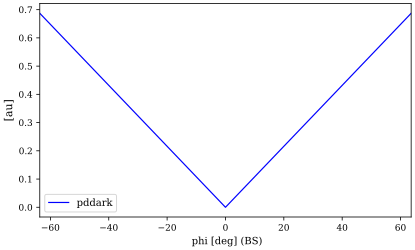

In [3]:

out1.info()
out1.plot(['pddark'])